Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.2962 - val_loss: 0.1478
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1420 - val_loss: 0.1270
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1262 - val_loss: 0.1184
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1185 - val_loss: 0.1133
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1140 - val_loss: 0.1104
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1109 - val_loss: 0.1082
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1085 - val_loss: 0.1062
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1067 - val_loss: 0.1040
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1054 - val_loss: 0.1029
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1039 - val_loss: 0.1017


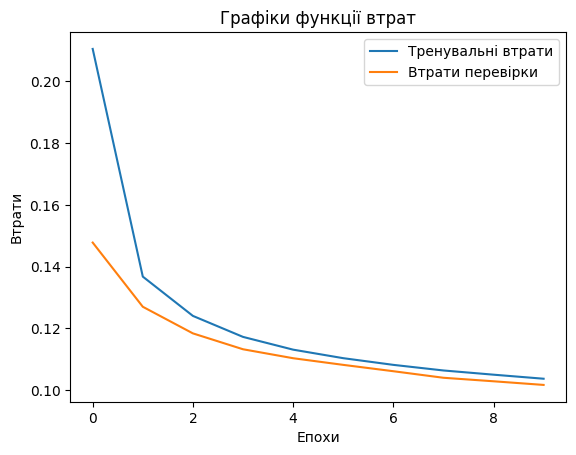

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


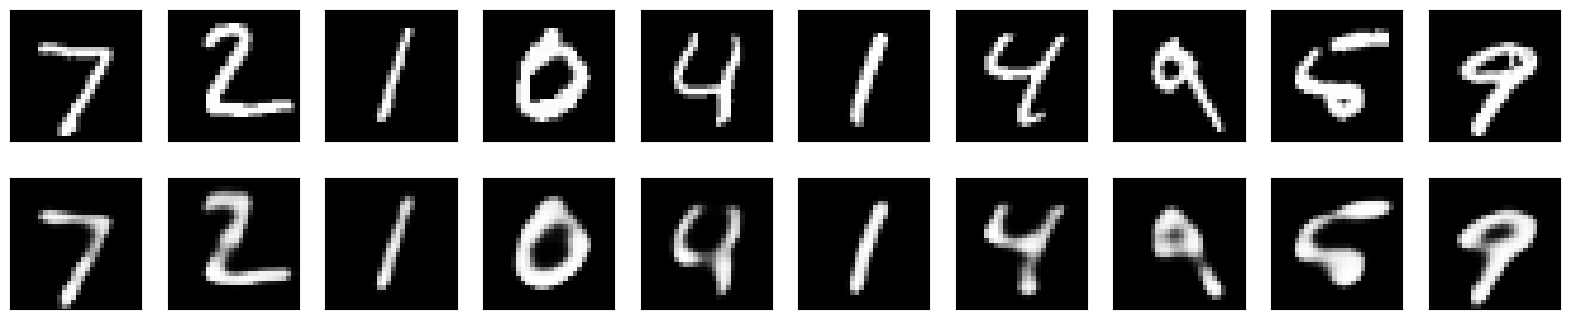

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Завантаження даних
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

# Енкодер
x = Conv2D(16, (3, 3), activation='tanh', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)   
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодер
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='tanh', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='tanh')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train, 
                          epochs=10, 
                          batch_size=128, 
                          shuffle=True,   
                          validation_data=(x_test, x_test))

plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Втрати перевірки')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.title('Графіки функції втрат')
plt.show()

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
